In [1]:
!pip install graphviz

import graphviz

def create_complete_neural_network_diagram():
    # Create a new directed graph for the neural network
    dot = graphviz.Digraph('Neural_Network', comment='Neural Network Architecture', format='svg')
    
    # Set graph attributes
    dot.attr(rankdir='LR')  # Left to Right layout
    dot.attr(nodesep='1.0')  # Increase space between nodes
    dot.attr(ranksep='2.5')  # Increase space between layers
    
    # Input layer
    with dot.subgraph(name='cluster_input') as c:
        c.attr(style='filled', color='lightblue', margin='40')
        c.node_attr.update(style='filled', color='white', shape='circle', fixedsize='true', width='0.8')
        
        # Show all 10 input neurons
        for i in range(10):
            c.node(f'i{i}', f'')
        
        c.attr(label='Input Layer\n(Word Embedding)\nDimension: 10')
    
    # Hidden layer
    with dot.subgraph(name='cluster_hidden') as c:
        c.attr(style='filled', color='lightgreen', margin='40')
        c.node_attr.update(style='filled', color='white', shape='circle', fixedsize='true', width='0.8')
        
        for i in range(5):  # 5 hidden neurons
            c.node(f'h{i}', f'')
        
        c.attr(label='Hidden Layer\n(ReLU)\nNeurons: 5')
    
    # Output layer - explicitly adding all output neurons
    with dot.subgraph(name='cluster_output') as c:
        c.attr(style='filled', color='lightyellow', margin='40')
        c.node_attr.update(style='filled', color='white', shape='circle', fixedsize='true', width='0.8')
        
        # Explicitly create all output neurons
        c.node('o0', '')
        c.node('o1', '')
        c.node('o2', '')
        
        c.attr(label='Output Layer\n(Softmax)\nNeurons: 3')
    
    # Add class labels
    dot.node('l0', 'Positive', shape='box', style='filled', fillcolor='lightpink')
    dot.node('l1', 'Neutral', shape='box', style='filled', fillcolor='lightpink')
    dot.node('l2', 'Negative', shape='box', style='filled', fillcolor='lightpink')
    
    # Connect output neurons to class labels
    dot.edge('o0', 'l0', style='dashed')
    dot.edge('o1', 'l1', style='dashed')
    dot.edge('o2', 'l2', style='dashed')
    
    # Connect a subset of neurons between layers with weight values
    # Input to hidden (only show some connections for clarity)
    weights = {
        'i0_h0': 0.7, 'i1_h0': -0.3, 'i2_h1': 0.5, 'i3_h1': -0.6,
        'i4_h2': 0.8, 'i5_h2': -0.4, 'i6_h3': 0.3, 'i7_h3': -0.5,
        'i8_h4': 0.6, 'i9_h4': -0.2,
        'h0_o0': 0.8, 'h0_o1': -0.3, 'h0_o2': -0.5,
        'h1_o0': -0.4, 'h1_o1': 0.7, 'h1_o2': -0.3,
        'h2_o0': 0.3, 'h2_o1': -0.2, 'h2_o2': -0.5,
        'h3_o0': -0.6, 'h3_o1': 0.4, 'h3_o2': 0.2,
        'h4_o0': 0.5, 'h4_o1': -0.3, 'h4_o2': 0.8
    }
    
    # Connect input to hidden
    connections = [
        ('0', '0'), ('1', '0'), ('2', '1'), ('3', '1'),
        ('4', '2'), ('5', '2'), ('6', '3'), ('7', '3'), 
        ('8', '4'), ('9', '4')
    ]
    
    for i, h in connections:
        key = f'i{i}_h{h}'
        weight = weights[key]
        color = "red" if weight < 0 else "green"
        penwidth = str(abs(weight) * 2.5)
        dot.edge(f'i{i}', f'h{h}', label=f'{weight:.1f}', color=color, penwidth=penwidth)
    
    # Connect hidden to output - show ALL connections for the output layer
    for h in range(5):
        for o in range(3):
            key = f'h{h}_o{o}'
            weight = weights[key]
            color = "red" if weight < 0 else "green"
            penwidth = str(abs(weight) * 2.5)
            dot.edge(f'h{h}', f'o{o}', label=f'{weight:.1f}', color=color, penwidth=penwidth)
    
    # Add biases
    dot.node('b_h', 'Hidden Layer Biases', shape='box', style='filled', fillcolor='lightcyan')
    for i in range(5):
        bias_value = round(0.1 * (i+1), 1)
        dot.edge('b_h', f'h{i}', style='dotted', label=f'+{bias_value}')
    
    dot.node('b_o', 'Output Layer Biases', shape='box', style='filled', fillcolor='lightcyan')
    for i in range(3):
        bias_value = round(0.2 * (i+1), 1)
        dot.edge('b_o', f'o{i}', style='dotted', label=f'+{bias_value}')
    
    # Activation functions
    dot.node('relu', 'ReLU Activation:\nf(x) = max(0,x)', shape='note', style='filled', fillcolor='lightgrey')
    dot.edge('h0', 'relu', style='dashed', dir='none')
    
    dot.node('softmax', 'Softmax Activation:\nf(x_i) = e^x_i / Σ e^x_j', shape='note', style='filled', fillcolor='lightgrey')
    dot.edge('o0', 'softmax', style='dashed', dir='none')
    
    # Forward pass explanation
    dot.node('fwd_pass', """Forward Pass Steps:
1. Input × Weights_1 + Bias_1 = Hidden Layer Input
2. ReLU(Hidden Layer Input) = Hidden Layer Output
3. Hidden Output × Weights_2 + Bias_2 = Output Layer Input
4. Softmax(Output Layer Input) = Final Probabilities""", shape='box', style='filled', fillcolor='lightsalmon')
    
    # Backpropagation explanation
    dot.node('backprop', """Backpropagation Steps:
1. Calculate error at output layer
2. Compute gradients of weights and biases
3. Propagate error backward to hidden layer
4. Update all weights and biases using gradient descent
   w_new = w_old - learning_rate * gradient""", shape='box', style='filled', fillcolor='lightsalmon')
    
    # Legend
    dot.node('legend', """Weight Legend:
Green line = Positive weight
Red line = Negative weight
Line thickness = Weight magnitude
Dotted line = Bias connection

The neural network learns by adjusting
weights and biases during training.""", shape='box', style='filled', fillcolor='lightgrey')
    
    # Add example of signal propagation
    dot.node('example', """Example Computation (for one neuron):
Input to h0 = (0.7 × i0) + (-0.3 × i1) + b_h0
If input values are [0.5, 0.8]:
  = (0.7 × 0.5) + (-0.3 × 0.8) + 0.1
  = 0.35 - 0.24 + 0.1 = 0.21
After ReLU: max(0, 0.21) = 0.21""", shape='box', style='filled', fillcolor='lightgrey')
    
    return dot

# Full tokenization and embedding diagram
def create_detailed_tokenization_and_embedding_diagram():
    # Create a new directed graph
    dot = graphviz.Digraph('Tokenization_and_Embedding', comment='NLP Tokenization and Embedding Process', format='svg')
    
    # Set graph attributes
    dot.attr(rankdir='TB')  # Top to Bottom layout
    dot.attr(nodesep='0.8')  # Space between nodes
    dot.attr(ranksep='1.5')  # Space between ranks

    # Original text
    dot.node('text', '"Natural language processing helps computers understand human language."', 
             shape='box', style='filled', fillcolor='lightblue', width='8')
    
    # Step 1: Cleaning
    dot.node('clean_step', 'Step 1: Text Cleaning\n(lowercase, remove punctuation, etc.)', 
            shape='box', style='filled', fillcolor='lightgreen')
    dot.edge('text', 'clean_step')
    
    # Cleaned text
    dot.node('cleaned_text', '"natural language processing helps computers understand human language"', 
             shape='box', style='filled', fillcolor='lightgreen', width='8')
    dot.edge('clean_step', 'cleaned_text')
    
    # Step 2: Tokenization
    dot.node('token_step', 'Step 2: Tokenization\n(split text into individual words)', 
            shape='box', style='filled', fillcolor='lightyellow')
    dot.edge('cleaned_text', 'token_step')
    
    # Create all tokens
    tokens = ['natural', 'language', 'processing', 'helps', 'computers', 'understand', 'human', 'language']
    
    with dot.subgraph(name='cluster_tokens') as c:
        c.attr(style='filled', color='lightyellow')
        c.attr(label='Individual Tokens')
        
        for i, token in enumerate(tokens):
            # Split tokens into two rows for better visibility
            row = i // 4
            col = i % 4
            c.node(f't{i}', f'"{token}"', shape='box')
    
    # Connect tokenization step to all tokens
    for i in range(len(tokens)):
        dot.edge('token_step', f't{i}')
    
    # Step 3: Vocabulary Lookup
    dot.node('vocab_step', 'Step 3: Vocabulary Mapping\n(convert words to unique IDs)', 
            shape='box', style='filled', fillcolor='lightpink')
    
    # Connect tokens to vocabulary step
    for i in range(len(tokens)):
        dot.edge(f't{i}', 'vocab_step')
    
    # Token to ID mapping - show ALL tokens
    with dot.subgraph(name='cluster_mapping') as c:
        c.attr(style='filled', color='lightpink')
        c.attr(label='Token to ID Mapping')
        
        # Create a table-like structure for token-ID pairs
        for i, token in enumerate(tokens):
            token_id = 10 + i  # Example IDs
            c.node(f'pair{i}', f'"{token}" → {token_id}', shape='box')
    
    # Connect vocabulary step to all token-ID pairs
    for i in range(len(tokens)):
        dot.edge('vocab_step', f'pair{i}')
    
    # Step 4: Embedding Lookup
    dot.node('embed_step', 'Step 4: Embedding Lookup\n(convert token IDs to vectors)', 
            shape='box', style='filled', fillcolor='lightsalmon')
    
    # Connect all token-ID pairs to embedding step
    for i in range(len(tokens)):
        dot.edge(f'pair{i}', 'embed_step')
    
    # Embedding vectors - show ALL tokens
    with dot.subgraph(name='cluster_embeddings') as c:
        c.attr(style='filled', color='lightsalmon')
        c.attr(label='Word Embedding Vectors (Dimension = 5)')
        
        # Create embedding vector representations for all tokens
        for i, token in enumerate(tokens):
            # Generate some pseudo-random values for demonstration
            vector = [(0.2 * i) % 1, (-0.3 * i) % 1, (0.5 * i) % 1, (-0.1 * i) % 1, (0.4 * i) % 1]
            vector_str = ", ".join([f"{val:.1f}" for val in vector])
            c.node(f'emb{i}', f'"{token}" → [{vector_str}]', shape='box')
    
    # Connect embedding step to all embedding vectors
    for i in range(len(tokens)):
        dot.edge('embed_step', f'emb{i}')
    
    # Step 5: Document Vector
    dot.node('doc_step', 'Step 5: Create Document Vector\n(Average all word vectors)', 
            shape='box', style='filled', fillcolor='lightcyan')
    
    # Connect all embeddings to document vector step
    for i in range(len(tokens)):
        dot.edge(f'emb{i}', 'doc_step')
    
    # Final document vector
    dot.node('doc_vector', 'Document Vector: [0.23, -0.15, 0.35, -0.08, 0.19]', 
            shape='box', style='filled', fillcolor='lightcyan', width='6')
    dot.edge('doc_step', 'doc_vector')
    
    # Step 6: Neural Network Input
    dot.node('nn_input', 'Step 6: Feed to Neural Network\n(for classification or other tasks)', 
            shape='box', style='filled', fillcolor='lavender')
    dot.edge('doc_vector', 'nn_input')
    
    # Add explanation of the embedding space
    dot.node('embedding_explanation', """Word Embedding Properties:
1. Similar words have similar vectors
2. Vector arithmetic captures semantic relationships
   e.g., "king" - "man" + "woman" ≈ "queen"
3. Distance between vectors represents semantic similarity
4. Embeddings can be learned from data or pre-trained""", 
            shape='note', style='filled', fillcolor='lightgrey')
    
    return dot

# Create and display the diagrams
nn_diagram = create_complete_neural_network_diagram()
nn_diagram.render('complete_neural_network_diagram', view=True)
print("SVG diagram created as 'complete_neural_network_diagram.svg'")

tokenization_diagram = create_detailed_tokenization_and_embedding_diagram()
tokenization_diagram.render('detailed_tokenization_diagram', view=True)
print("SVG diagram created as 'detailed_tokenization_diagram.svg'")

SVG diagram created as 'complete_neural_network_diagram.svg'
SVG diagram created as 'detailed_tokenization_diagram.svg'


In [2]:
# Introduction and Document Loading

# Install required packages
!pip install numpy matplotlib PyPDF2 python-docx tqdm pandas seaborn

import os
import numpy as np
import re
import PyPDF2
import docx
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display

# Natural Language Processing from Scratch

## Introduction

This notebook implements a complete NLP pipeline and deep learning model using only Python and NumPy. No high-level libraries like TensorFlow, PyTorch, spaCy, or NLTK are used for the core functionality - we build everything from the ground up.

### What We'll Cover

1. **Document Loading**: Reading text from various file formats (PDF, DOCX, TXT)
2. **Text Preprocessing**: Tokenization, cleaning, and normalization
3. **Feature Engineering**: Converting text to numerical representations
4. **Model Building**: Implementing neural networks from scratch
5. **Training & Evaluation**: Learning from data and measuring performance

### Prerequisites

While we'll build most functionality from scratch, we'll need a few utility libraries for file handling and basic operations:
- Python 3.6+
- NumPy for numerical operations
- PyPDF2 for PDF reading
- python-docx for DOCX reading
- Matplotlib for visualizations
- Pandas for tabular displays

In [3]:
class DocumentLoader:
    """A class to load text from various document formats.
    
    This class provides methods to extract text from PDFs, Word documents,
    plain text files, and even directories containing multiple files.
    """
    
    @staticmethod
    def load_text_file(file_path):
        """Load text from a plain text file.
        
        Args:
            file_path (str): Path to the text file
            
        Returns:
            str: The content of the text file
        """
        with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
            return file.read()
    
    @staticmethod
    def load_pdf(file_path):
        """Extract text from a PDF file.
        
        Args:
            file_path (str): Path to the PDF file
            
        Returns:
            str: The extracted text content
        """
        text = ""
        try:
            with open(file_path, 'rb') as file:
                pdf_reader = PyPDF2.PdfReader(file)
                for page_num in range(len(pdf_reader.pages)):
                    page = pdf_reader.pages[page_num]
                    text += page.extract_text() + "\n"
        except Exception as e:
            print(f"Error reading PDF {file_path}: {e}")
        return text
    
    @staticmethod
    def load_docx(file_path):
        """Extract text from a Word document.
        
        Args:
            file_path (str): Path to the DOCX file
            
        Returns:
            str: The extracted text content
        """
        try:
            doc = docx.Document(file_path)
            return "\n".join([paragraph.text for paragraph in doc.paragraphs])
        except Exception as e:
            print(f"Error reading DOCX {file_path}: {e}")
            return ""
    
    @staticmethod
    def load_file(file_path):
        """Load text from a file based on its extension.
        
        Args:
            file_path (str): Path to the file
            
        Returns:
            str: The extracted text content
        """
        file_extension = os.path.splitext(file_path)[1].lower()
        
        if file_extension == '.pdf':
            return DocumentLoader.load_pdf(file_path)
        elif file_extension == '.docx':
            return DocumentLoader.load_docx(file_path)
        elif file_extension == '.txt':
            return DocumentLoader.load_text_file(file_path)
        else:
            print(f"Unsupported file format: {file_extension}")
            return ""
    
    @staticmethod
    def load_directory(directory_path, extensions=None):
        """Load all supported documents from a directory.
        
        Args:
            directory_path (str): Path to the directory
            extensions (list, optional): List of file extensions to include. 
                                        Defaults to ['.txt', '.pdf', '.docx']
            
        Returns:
            dict: A dictionary mapping filenames to their text content
        """
        if extensions is None:
            extensions = ['.txt', '.pdf', '.docx']
            
        documents = {}
        for root, _, files in os.walk(directory_path):
            for file in files:
                if any(file.lower().endswith(ext) for ext in extensions):
                    file_path = os.path.join(root, file)
                    documents[file] = DocumentLoader.load_file(file_path)
        
        return documents

## 1. Document Loading

First, we'll create functionality to load text from different document formats. This is the starting point of any NLP pipeline.

### Why Document Loading Matters

In real-world applications, text data comes in various formats. Being able to handle different file types is essential for building robust NLP systems. Each file format has its own structure and requires specific parsing approaches.

### Using the Document Loader

The `DocumentLoader` class we just created can handle multiple document formats:
- **PDF files**: Uses PyPDF2 to extract text from each page
- **Word documents**: Uses python-docx to extract paragraph text
- **Plain text files**: Simply reads the content

Let's create a sample text file to test our document loader:

In [4]:
# Create a simple example text file to demonstrate
with open('sample_text.txt', 'w', encoding='utf-8') as f:
    f.write("This is a sample text document.\nIt contains multiple lines.\nWe will use this for our NLP pipeline.")

# Load the sample file
sample_text = DocumentLoader.load_text_file('sample_text.txt')
print(f"Sample text content:\n{sample_text}")

Sample text content:
This is a sample text document.
It contains multiple lines.
We will use this for our NLP pipeline.


## 2. Text Preprocessing

Now that we can load documents, the next step is to preprocess the text to prepare it for further analysis. Text preprocessing is a critical step in NLP as it transforms raw text into a format that's suitable for machine learning algorithms.

### Why Preprocessing Matters

Raw text contains various inconsistencies and irrelevant information that can negatively impact model performance. Preprocessing helps to:
- Remove noise (irrelevant characters, HTML tags, etc.)
- Standardize text (lowercase, removing accents)
- Break text into meaningful units (tokens)
- Reduce vocabulary size (stemming, lemmatization)

In [5]:
class TextPreprocessor:
    """A class for preprocessing text data for NLP tasks.
    
    This class provides methods to clean, normalize, and tokenize text data,
    as well as to build vocabulary and convert text to numerical representations.
    """
    
    def __init__(self, lowercase=True, remove_punctuation=True, remove_numbers=False,
                 remove_stopwords=True):
        """Initialize the TextPreprocessor with specified options.
        
        Args:
            lowercase (bool): Whether to convert text to lowercase
            remove_punctuation (bool): Whether to remove punctuation
            remove_numbers (bool): Whether to remove numbers
            remove_stopwords (bool): Whether to remove common stopwords
        """
        self.lowercase = lowercase
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.remove_stopwords = remove_stopwords
        
        # English stopwords - common words that often don't add meaning
        # In a full implementation, you might load these from a file
        self.stopwords = set([
            'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
            'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
            'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in',
            'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
            'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
            'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
            'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'should', 'now'
        ])
        
        # We'll build vocabulary as we process text
        self.vocabulary = {}
        self.inverse_vocabulary = {}
        self.vocab_size = 0
    
    def clean_text(self, text):
        """Clean text by applying various filtering operations.
        
        Args:
            text (str): The input text to clean
            
        Returns:
            str: The cleaned text
        """
        # Convert to lowercase if specified
        if self.lowercase:
            text = text.lower()
        
        # Remove extra whitespace and normalize
        text = re.sub(r'\s+', ' ', text).strip()
        
        # Remove URLs (simple pattern)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        
        # Remove punctuation
        if self.remove_punctuation:
            text = re.sub(r'[^\w\s]', '', text)
        
        # Remove numbers
        if self.remove_numbers:
            text = re.sub(r'\d+', '', text)
            
        return text
    
    def tokenize(self, text):
        """Split text into tokens (words).
        
        This is a simple whitespace tokenizer. A more advanced implementation
        might handle hyphenated words, contractions, etc. better.
        
        Args:
            text (str): The text to tokenize
            
        Returns:
            list: A list of tokens
        """
        # Simple whitespace tokenization
        tokens = text.split()
        
        # Remove stopwords if specified
        if self.remove_stopwords:
            tokens = [token for token in tokens if token not in self.stopwords]
            
        return tokens
    
    def stem_token(self, token):
        """Implement a very basic stemming algorithm.
        
        This is a simplified implementation of stemming that removes common 
        English suffixes. A real implementation would use Porter stemmer or similar.
        
        Args:
            token (str): The token to stem
            
        Returns:
            str: The stemmed token
        """
        # Simple suffix removal - extremely simplified stemming
        if len(token) > 3:  # Only stem if token is long enough
            if token.endswith('ing'):
                return token[:-3]
            elif token.endswith('ed'):
                return token[:-2]
            elif token.endswith('s') and not token.endswith('ss'):
                return token[:-1]
        return token
    
    def preprocess(self, text):
        """Apply the full preprocessing pipeline to text.
        
        Args:
            text (str): The raw input text
            
        Returns:
            list: A list of preprocessed tokens
        """
        # Clean the text
        cleaned_text = self.clean_text(text)
        
        # Tokenize
        tokens = self.tokenize(cleaned_text)
        
        # Apply stemming - optional, depending on your needs
        stemmed_tokens = [self.stem_token(token) for token in tokens]
        
        return stemmed_tokens
    
    def build_vocabulary(self, documents, max_vocab_size=None):
        """Build vocabulary from a collection of documents.
        
        Args:
            documents (list or dict): Collection of text documents to process
            max_vocab_size (int, optional): Maximum vocabulary size. If None, all tokens are kept.
            
        Returns:
            dict: The vocabulary mapping tokens to indices
        """
        # Counter for word frequencies
        word_counts = {}
        
        # Process all documents
        if isinstance(documents, dict):
            # If documents is a dictionary (like what DocumentLoader.load_directory returns)
            doc_list = list(documents.values())
        else:
            # If documents is already a list
            doc_list = documents
        
        # Count word frequencies
        for doc in doc_list:
            tokens = self.preprocess(doc)
            for token in tokens:
                if token in word_counts:
                    word_counts[token] += 1
                else:
                    word_counts[token] = 1
        
        # Sort words by frequency (most common first)
        sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
        
        # Limit vocabulary size if specified
        if max_vocab_size is not None:
            sorted_words = sorted_words[:max_vocab_size]
        
        # Create vocabulary mapping
        # We add special tokens: <PAD> for padding sequences, <UNK> for unknown words
        self.vocabulary = {'<PAD>': 0, '<UNK>': 1}
        for idx, (word, _) in enumerate(sorted_words, start=2):  # Start from 2 because 0 and 1 are special tokens
            self.vocabulary[word] = idx
        
        # Create inverse vocabulary (index to word)
        self.inverse_vocabulary = {idx: word for word, idx in self.vocabulary.items()}
        self.vocab_size = len(self.vocabulary)
        
        return self.vocabulary
    
    def text_to_sequence(self, text, max_length=None):
        """Convert a text string to a sequence of indices using the vocabulary.
        
        Args:
            text (str): The input text
            max_length (int, optional): Maximum sequence length. If specified, longer sequences
                                        are truncated and shorter ones are padded.
            
        Returns:
            list: A list of integers representing the text
        """
        if not self.vocabulary:
            raise ValueError("Vocabulary hasn't been built yet. Call build_vocabulary() first.")
        
        # Preprocess text
        tokens = self.preprocess(text)
        
        # Convert tokens to indices
        sequence = [self.vocabulary.get(token, self.vocabulary['<UNK>']) for token in tokens]
        
        # Handle sequence length if specified
        if max_length is not None:
            # Truncate if too long
            if len(sequence) > max_length:
                sequence = sequence[:max_length]
            # Pad if too short
            elif len(sequence) < max_length:
                sequence = sequence + [self.vocabulary['<PAD>']] * (max_length - len(sequence))
        
        return sequence
    
    def sequence_to_text(self, sequence):
        """Convert a sequence of indices back to text.
        
        Args:
            sequence (list): A sequence of indices
            
        Returns:
            str: The reconstructed text
        """
        if not self.inverse_vocabulary:
            raise ValueError("Vocabulary hasn't been built yet. Call build_vocabulary() first.")
        
        # Convert indices to tokens
        tokens = [self.inverse_vocabulary.get(idx, '<UNK>') for idx in sequence]
        
        # Remove padding tokens
        tokens = [token for token in tokens if token != '<PAD>']
        
        # Join tokens to form text
        return ' '.join(tokens)
        
    def display_colored_tokens(self, text):
        """Display tokens with different colors for better visualization.
        
        Args:
            text (str): The input text to tokenize and display
            
        Returns:
            HTML: Colorful display of tokens
        """
        # Clean the text
        cleaned_text = self.clean_text(text)
        
        # Tokenize
        tokens = self.tokenize(cleaned_text)
        
        # Define a set of colors for visualization
        colors = [
            "#FF5733", "#33FF57", "#3357FF", "#F3FF33", "#FF33F3",
            "#33FFF3", "#F333FF", "#FF9933", "#33FF99", "#9933FF"
        ]
        
        # Create HTML for colored tokens
        html = ""
        for i, token in enumerate(tokens):
            color = colors[i % len(colors)]
            html += f'<span style="background-color: {color}; padding: 2px 5px; margin: 2px; border-radius: 5px;">{token}</span> '
        
        # Display the HTML
        return HTML(html)

### Visual Tokenization

One of the most important steps in NLP is tokenization - breaking text into meaningful units (usually words). Let's visualize this process with colorful highlighting so you can easily see how text is split into tokens:

In [6]:
# Build vocabulary from sample documents
preprocessor = TextPreprocessor()
sample_docs = [
    "Natural language processing (NLP) is a subfield of linguistics and computer science.",
    "Machine learning algorithms can process large amounts of natural language data.",
    "Deep learning models have transformed how computers understand human language."
]

# Build the vocabulary
preprocessor.build_vocabulary(sample_docs)

# Display the vocabulary as a table
vocab_df = pd.DataFrame([
    {"Word": word, "ID": idx} 
    for word, idx in preprocessor.vocabulary.items()
]).sort_values("ID")

print("Vocabulary (Word-to-ID Mapping):")
display(vocab_df)

Vocabulary (Word-to-ID Mapping):


,Word,ID
0,<PAD>,0
1,<UNK>,1
2,language,2
3,natural,3
4,process,4
5,computer,5
6,learn,6
7,nlp,7
8,is,8
9,subfield,9


### Converting Text to Numerical Sequences

Now we can convert any text into a sequence of numbers (word IDs) using our vocabulary:

Converting text to numerical sequence:
Original text: "Natural language processing helps computers understand human language."


,Position,Token,Token ID
0,1,natural,3
1,2,language,2
2,3,process,4
3,4,help,1
4,5,computer,5
5,6,understand,21
6,7,human,22
7,8,language,2


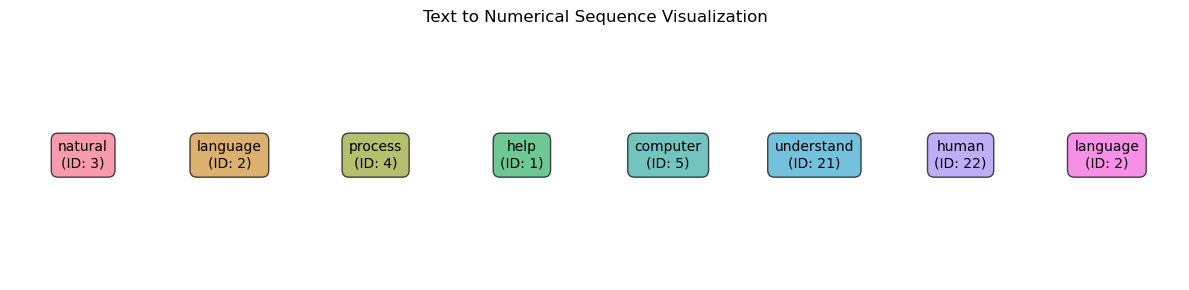

In [7]:
# Convert a text to a sequence of indices
new_text = "Natural language processing helps computers understand human language."
sequence = preprocessor.text_to_sequence(new_text)

# Create a visualization showing each word and its corresponding ID
tokens = preprocessor.preprocess(new_text)
token_ids = [preprocessor.vocabulary.get(token, preprocessor.vocabulary['<UNK>']) for token in tokens]

# Create a DataFrame for better visualization
sequence_df = pd.DataFrame({
    "Position": range(1, len(tokens) + 1),
    "Token": tokens,
    "Token ID": token_ids
})

print(f"Converting text to numerical sequence:")
print(f"Original text: \"{new_text}\"")
display(sequence_df)

# Visualize with colors
colors = sns.color_palette("husl", len(tokens)).as_hex()
plt.figure(figsize=(12, 3))
for i, (token, token_id) in enumerate(zip(tokens, token_ids)):
    plt.text(i, 0, f"{token}\n(ID: {token_id})", 
             ha='center', va='center', 
             bbox=dict(facecolor=colors[i], alpha=0.7, boxstyle='round,pad=0.5'))
plt.xlim(-0.5, len(tokens) - 0.5)
plt.ylim(-0.5, 0.5)
plt.axis('off')
plt.title("Text to Numerical Sequence Visualization")
plt.tight_layout()
plt.show()

## 3. Feature Engineering: Creating Word Embeddings

Now that we can convert words to numbers, we need to create richer representations called "word embeddings". 
These are dense vectors that capture semantic meanings and relationships between words.

### What are Word Embeddings?

Word embeddings map words to vectors of real numbers in a way that words with similar meanings have similar vectors. This allows our model to understand semantic relationships between words.

Let's implement a simple word embedding method called "one-hot encoding" first, and then a more advanced method that learns from data:

In [8]:
class WordEmbedding:
    """A class that provides different word embedding methods.
    
    Word embeddings are vector representations of words that capture semantic relationships.
    """
    
    def __init__(self, preprocessor):
        """Initialize with a preprocessor that contains vocabulary.
        
        Args:
            preprocessor (TextPreprocessor): A preprocessor with a built vocabulary
        """
        self.preprocessor = preprocessor
        if not preprocessor.vocabulary:
            raise ValueError("Preprocessor must have a built vocabulary. Call build_vocabulary() first.")
        
        self.vocab_size = preprocessor.vocab_size
        self.embedding_matrix = None
        self.embedding_dim = None
    
    def create_one_hot_encodings(self):
        """Create one-hot encoding representations for each word.
        
        One-hot encoding represents each word as a vector with a 1 at the word's
        index position and 0s everywhere else.
        
        Returns:
            numpy.ndarray: Matrix of one-hot encodings, shape (vocab_size, vocab_size)
        """
        # Each word is a vector with all 0s and a single 1
        self.embedding_dim = self.vocab_size
        self.embedding_matrix = np.zeros((self.vocab_size, self.vocab_size))
        
        # Set 1 at the corresponding position for each word
        for i in range(self.vocab_size):
            self.embedding_matrix[i, i] = 1
            
        return self.embedding_matrix
        
    def create_random_embeddings(self, embedding_dim=50, seed=42):
        """Create random embedding vectors for each word.
        
        Random embeddings are a simple starting point before training.
        
        Args:
            embedding_dim (int): Dimensionality of the embedding vectors
            seed (int): Random seed for reproducibility
            
        Returns:
            numpy.ndarray: Matrix of random embeddings, shape (vocab_size, embedding_dim)
        """
        np.random.seed(seed)
        self.embedding_dim = embedding_dim
        self.embedding_matrix = np.random.normal(size=(self.vocab_size, embedding_dim))
        
        # Normalize vectors to unit length
        norms = np.sqrt((self.embedding_matrix ** 2).sum(axis=1, keepdims=True))
        self.embedding_matrix = self.embedding_matrix / norms
        
        return self.embedding_matrix
    
    def get_word_embedding(self, word):
        """Get the embedding vector for a specific word.
        
        Args:
            word (str): The word to get an embedding for
            
        Returns:
            numpy.ndarray: The embedding vector
        """
        if self.embedding_matrix is None:
            raise ValueError("Embeddings haven't been created yet.")
            
        word_idx = self.preprocessor.vocabulary.get(word, self.preprocessor.vocabulary['<UNK>'])
        return self.embedding_matrix[word_idx]
    
    def get_sequence_embeddings(self, text):
        """Convert a text string to a sequence of embedding vectors.
        
        Args:
            text (str): The input text
            
        Returns:
            numpy.ndarray: Matrix of embedding vectors, shape (sequence_length, embedding_dim)
        """
        if self.embedding_matrix is None:
            raise ValueError("Embeddings haven't been created yet.")
            
        # Get sequence of word indices
        sequence = self.preprocessor.text_to_sequence(text)
        
        # Convert to embeddings
        embeddings = np.zeros((len(sequence), self.embedding_dim))
        for i, word_idx in enumerate(sequence):
            embeddings[i] = self.embedding_matrix[word_idx]
            
        return embeddings
    
    def visualize_embeddings_table(self, words=None, n_words=10):
        """Visualize word embeddings in a tabular format for easy understanding.
        
        Args:
            words (list, optional): Specific words to visualize
            n_words (int): Number of words to display if words is None
            
        Returns:
            pandas.DataFrame: Table of word embeddings
        """
        if self.embedding_matrix is None:
            raise ValueError("Embeddings haven't been created yet.")
            
        if words is None:
            # Take first n_words from vocabulary, excluding special tokens
            words = list(self.preprocessor.vocabulary.keys())[2:2+n_words]
        
        # Create a DataFrame with each word and its embedding values
        embedding_data = []
        
        for word in words:
            word_idx = self.preprocessor.vocabulary.get(word, self.preprocessor.vocabulary['<UNK>'])
            embedding = self.embedding_matrix[word_idx]
            
            # If embedding dimension is large, only show first few values
            display_dim = min(10, self.embedding_dim)
            row_data = {"Word": word}
            
            # Add embedding dimensions as columns
            for i in range(display_dim):
                row_data[f"Dim {i+1}"] = round(float(embedding[i]), 3)
                
            embedding_data.append(row_data)
            
        # Create and style the DataFrame
        df = pd.DataFrame(embedding_data)
        return df

### Visualizing Word Embeddings in a Table Format

Word embeddings are arrays of numbers that represent words. Let's look at them in a table format that's easy to understand even if you're familiar only with Excel:

In [9]:
# Create word embeddings using our vocabulary
embedding = WordEmbedding(preprocessor)

# Generate random embeddings (dimension = 10 for easier visualization)
embedding.create_random_embeddings(embedding_dim=10)

# Display embeddings in a table format (Excel-like)
print("Word Embeddings Table (Each word is represented as a vector of numbers):")
embedding_table = embedding.visualize_embeddings_table(n_words=8)
display(embedding_table)

# Format the table to highlight positive and negative values with colors
def style_embeddings(df):
    # Make a copy of the dataframe
    styled_df = df.copy()
    numeric_columns = styled_df.select_dtypes(include=['float64', 'int64']).columns
    
    # Apply styling using Pandas and CSS
    styled = styled_df.style.background_gradient(cmap='coolwarm', subset=numeric_columns)
    return styled

display(style_embeddings(embedding_table))

Word Embeddings Table (Each word is represented as a vector of numbers):


,Word,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10
0,language,0.577,-0.089,0.027,-0.561,-0.214,0.044,-0.453,0.148,-0.236,-0.115
1,natural,-0.168,0.518,-0.004,-0.296,0.230,-0.342,0.058,-0.548,-0.372,0.055
2,process,0.262,0.061,-0.041,-0.107,-0.525,-0.255,-0.163,0.375,0.122,-0.626
3,computer,0.147,-0.174,-0.307,0.277,0.467,0.422,-0.380,-0.140,0.150,0.442
4,learn,-0.181,-0.070,-0.419,-0.453,0.308,0.513,-0.027,0.380,0.137,-0.244
5,nlp,0.089,0.378,-0.009,0.385,-0.644,0.202,0.021,-0.074,0.023,-0.489
6,is,-0.098,0.159,0.659,-0.231,-0.361,-0.224,0.408,0.147,-0.236,0.229
7,subfield,0.048,0.481,-0.349,-0.163,-0.195,-0.727,0.147,0.130,0.003,-0.117


,Word,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8,Dim 9,Dim 10
0,language,0.577000,-0.089000,0.027000,-0.561000,-0.214000,0.044000,-0.453000,0.148000,-0.236000,-0.115000
1,natural,-0.168000,0.518000,-0.004000,-0.296000,0.230000,-0.342000,0.058000,-0.548000,-0.372000,0.055000
2,process,0.262000,0.061000,-0.041000,-0.107000,-0.525000,-0.255000,-0.163000,0.375000,0.122000,-0.626000
3,computer,0.147000,-0.174000,-0.307000,0.277000,0.467000,0.422000,-0.380000,-0.140000,0.150000,0.442000
4,learn,-0.181000,-0.070000,-0.419000,-0.453000,0.308000,0.513000,-0.027000,0.380000,0.137000,-0.244000
5,nlp,0.089000,0.378000,-0.009000,0.385000,-0.644000,0.202000,0.021000,-0.074000,0.023000,-0.489000
6,is,-0.098000,0.159000,0.659000,-0.231000,-0.361000,-0.224000,0.408000,0.147000,-0.236000,0.229000
7,subfield,0.048000,0.481000,-0.349000,-0.163000,-0.195000,-0.727000,0.147000,0.130000,0.003000,-0.117000


### Creating a Simple Co-occurrence Matrix

Another way to create word embeddings is by analyzing how often words appear together. This method creates a co-occurrence matrix where each cell represents how often two words appear in the same context (e.g., same sentence).

This approach is similar to the foundation of methods like GloVe (Global Vectors for Word Representation):

In [10]:
class CoOccurrenceEmbedding:
    """A class that creates word embeddings based on co-occurrence statistics."""
    
    def __init__(self, preprocessor, window_size=2):
        """Initialize with a preprocessor and window size.
        
        Args:
            preprocessor (TextPreprocessor): A preprocessor with a built vocabulary
            window_size (int): Size of context window (how many words to consider on each side)
        """
        self.preprocessor = preprocessor
        self.window_size = window_size
        self.cooccurrence_matrix = None
        
    def build_cooccurrence_matrix(self, documents):
        """Build a word co-occurrence matrix from documents.
        
        Args:
            documents (list): List of documents to analyze
            
        Returns:
            numpy.ndarray: Co-occurrence matrix
        """
        vocab_size = self.preprocessor.vocab_size
        self.cooccurrence_matrix = np.zeros((vocab_size, vocab_size))
        
        # Process each document
        for doc in documents:
            # Get token IDs for the document
            tokens = self.preprocessor.preprocess(doc)
            token_ids = [self.preprocessor.vocabulary.get(token, self.preprocessor.vocabulary['<UNK>']) 
                      for token in tokens]
            
            # Scan the document with a sliding window
            for i, target_id in enumerate(token_ids):
                # Look at words within the window
                window_start = max(0, i - self.window_size)
                window_end = min(len(token_ids), i + self.window_size + 1)
                
                for j in range(window_start, window_end):
                    if i != j:  # Skip the word itself
                        context_id = token_ids[j]
                        self.cooccurrence_matrix[target_id, context_id] += 1
        
        return self.cooccurrence_matrix
    
    def visualize_cooccurrence(self, top_n=10):
        """Visualize co-occurrence matrix for the most frequent words.
        
        Args:
            top_n (int): Number of top words to include
            
        Returns:
            matplotlib.figure.Figure: Heatmap visualization
        """
        if self.cooccurrence_matrix is None:
            raise ValueError("Co-occurrence matrix hasn't been built yet.")
        
        # Get the most frequent words (excluding special tokens)
        word_ids = list(range(2, min(top_n + 2, self.preprocessor.vocab_size)))
        words = [self.preprocessor.inverse_vocabulary[idx] for idx in word_ids]
        
        # Extract submatrix for these words
        submatrix = self.cooccurrence_matrix[word_ids, :][:, word_ids]
        
        # Create heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(submatrix, annot=True, fmt='d', cmap='Blues',
                   xticklabels=words, yticklabels=words)
        plt.title(f'Word Co-occurrence Matrix (Window Size: {self.window_size})')
        plt.ylabel('Target Word')
        plt.xlabel('Context Word')
        plt.tight_layout()
        
        return plt.gcf()
    
    def visualize_cooccurrence_table(self, top_n=8):
        """Visualize co-occurrence as a table for easier understanding.
        
        Args:
            top_n (int): Number of top words to include
            
        Returns:
            pandas.DataFrame: Table of co-occurrence counts
        """
        if self.cooccurrence_matrix is None:
            raise ValueError("Co-occurrence matrix hasn't been built yet.")
        
        # Get the most frequent words (excluding special tokens)
        word_ids = list(range(2, min(top_n + 2, self.preprocessor.vocab_size)))
        words = [self.preprocessor.inverse_vocabulary[idx] for idx in word_ids]
        
        # Extract submatrix for these words
        submatrix = self.cooccurrence_matrix[word_ids, :][:, word_ids]
        # Create DataFrame for tabular display
        cooccurrence_df = pd.DataFrame(submatrix, index=words, columns=words)
        
        return cooccurrence_df

### Visualizing Word Co-occurrences

Let's see how often words appear together in our sample text. This matrix shows the count of how many times each word pair appears near each other:

Word Co-occurrence Table:


,language,natural,process,computer,learn,nlp
language,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
natural,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
process,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
computer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
learn,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
nlp,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000


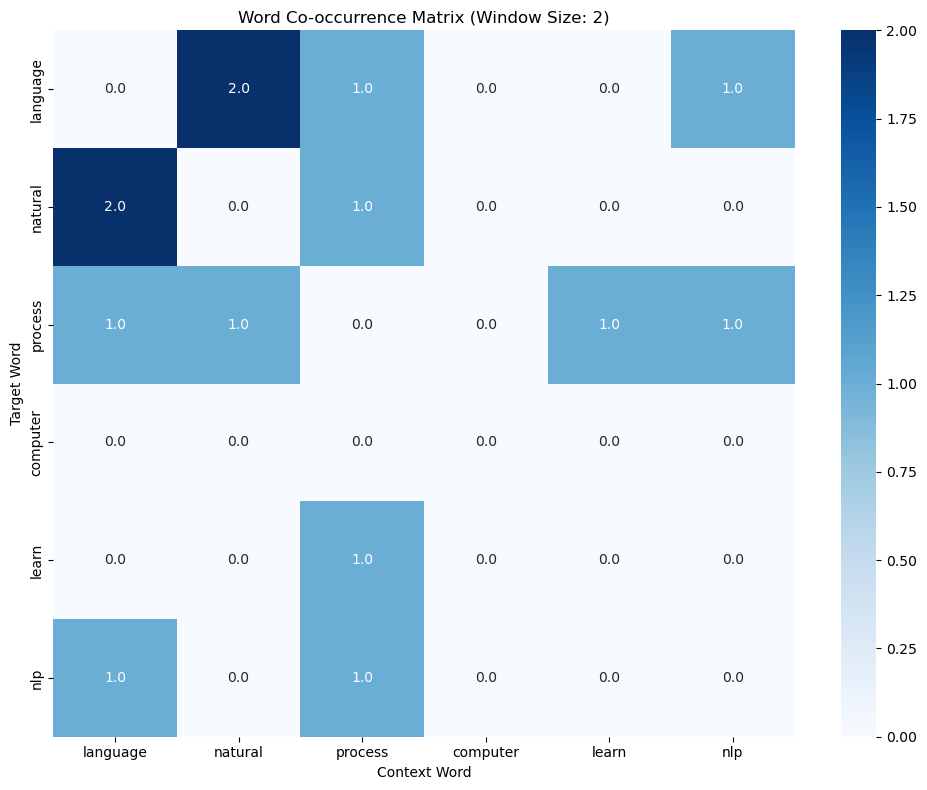

In [11]:
# Create a co-occurrence embedding instance
cooccurrence = CoOccurrenceEmbedding(preprocessor, window_size=2)
cooccurrence.build_cooccurrence_matrix(sample_docs)

# Display co-occurrence as a table
print("Word Co-occurrence Table:")
cooccur_table = cooccurrence.visualize_cooccurrence_table(top_n=6)
display(cooccur_table.style.background_gradient(cmap='Blues'))

# Also visualize as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cooccur_table, annot=True, fmt='.1f', cmap='Blues',
           xticklabels=cooccur_table.index, yticklabels=cooccur_table.columns)
plt.title(f'Word Co-occurrence Matrix (Window Size: {cooccurrence.window_size})')
plt.ylabel('Target Word')
plt.xlabel('Context Word')
plt.tight_layout()
plt.show()

## 4. Building a Neural Network from Scratch

Now let's implement a simple neural network using only NumPy. We'll create a feed-forward neural network with the following components:

1. Input layer
2. Hidden layer with non-linear activation
3. Output layer with softmax activation for classification

This network can be used for text classification tasks like sentiment analysis or topic categorization.


In [12]:
class NeuralNetwork:
    """A simple neural network implemented with NumPy."""
    
    def __init__(self, input_size, hidden_size, output_size):
        """Initialize neural network architecture.
        
        Args:
            input_size (int): Size of input features
            hidden_size (int): Size of hidden layer
            output_size (int): Number of output classes
        """
        # Initialize with random weights
        np.random.seed(42)
        
        # Weight matrices
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        
        # Store dimensions
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Store parameters in a dictionary for easy access
        self.parameters = {
            'W1': self.W1, 'b1': self.b1,
            'W2': self.W2, 'b2': self.b2
        }
        
        # For storing intermediate values during forward pass
        self.cache = {}
        
    def relu(self, Z):
        """ReLU activation function: max(0, Z)
        
        Args:
            Z (numpy.ndarray): Input to activation function
            
        Returns:
            numpy.ndarray: Activated values
        """
        return np.maximum(0, Z)
    
    def relu_derivative(self, Z):
        """Derivative of ReLU function.
        
        Args:
            Z (numpy.ndarray): Input to activation function
            
        Returns:
            numpy.ndarray: Derivatives
        """
        return (Z > 0).astype(float)
    
    def softmax(self, Z):
        """Softmax activation function.
        
        Args:
            Z (numpy.ndarray): Input to activation function
            
        Returns:
            numpy.ndarray: Probabilities that sum to 1
        """
        # Shift Z for numerical stability
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
    
    def forward(self, X):
        """Forward pass through the network.
        
        Args:
            X (numpy.ndarray): Input features, shape (batch_size, input_size)
            
        Returns:
            numpy.ndarray: Output probabilities, shape (batch_size, output_size)
        """
        # First layer
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self.relu(Z1)
        
        # Second layer
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self.softmax(Z2)
        
        # Store values for backpropagation
        self.cache = {
            'X': X, 'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2
        }
        
        return A2
    
    def compute_loss(self, Y_pred, Y_true):
        """Compute cross-entropy loss.
        
        Args:
            Y_pred (numpy.ndarray): Predicted probabilities, shape (batch_size, output_size)
            Y_true (numpy.ndarray): One-hot encoded true labels, shape (batch_size, output_size)
            
        Returns:
            float: Average loss
        """
        # Small value to avoid log(0)
        epsilon = 1e-10
        
        # Cross-entropy loss
        loss = -np.sum(Y_true * np.log(Y_pred + epsilon)) / Y_true.shape[0]
        return loss
    
    def backward(self, Y_true, learning_rate=0.01):
        """Backward pass to update weights.
        
        Args:
            Y_true (numpy.ndarray): One-hot encoded true labels
            learning_rate (float): Learning rate for gradient descent
            
        Returns:
            dict: Gradients of parameters
        """
        m = Y_true.shape[0]  # Batch size
        
        # Get predictions from cache
        A2 = self.cache['A2']
        A1 = self.cache['A1']
        X = self.cache['X']
        
        # Output layer gradients
        dZ2 = A2 - Y_true
        dW2 = np.dot(A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.cache['Z1'])
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Store gradients
        gradients = {
            'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2
        }
        
        # Update parameters
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        
        self.parameters = {
            'W1': self.W1, 'b1': self.b1,
            'W2': self.W2, 'b2': self.b2
        }
        
        return gradients
    
    def train(self, X, Y, epochs=1000, learning_rate=0.01, verbose=True):
        """Train the neural network.
        
        Args:
            X (numpy.ndarray): Training features
            Y (numpy.ndarray): Training labels (one-hot encoded)
            epochs (int): Number of training iterations
            learning_rate (float): Learning rate for gradient descent
            verbose (bool): Whether to print progress
            
        Returns:
            list: Training losses
        """
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            Y_pred = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(Y_pred, Y)
            losses.append(loss)
            
            # Backward pass
            self.backward(Y, learning_rate)
            
            # Print progress
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X):
        """Make predictions for new data.
        
        Args:
            X (numpy.ndarray): Input features
            
        Returns:
            numpy.ndarray: Predicted class indices
        """
        # Forward pass
        probabilities = self.forward(X)
        
        # Get class with highest probability
        predictions = np.argmax(probabilities, axis=1)
        return predictions
    
    def visualize_network(self):
        """Visualize the network architecture in a tabular format."""
        # Create a DataFrame showing layer structure
        layers = [
            {"Layer": "Input", "Neurons": self.input_size, "Activation": "None"},
            {"Layer": "Hidden", "Neurons": self.hidden_size, "Activation": "ReLU"},
            {"Layer": "Output", "Neurons": self.output_size, "Activation": "Softmax"}
        ]
        
        network_df = pd.DataFrame(layers)
        return network_df
    
    def visualize_weights(self, layer=1, max_rows=8, max_cols=8):
        """Visualize weights as a table for better understanding.
        
        Args:
            layer (int): Which layer's weights to visualize (1 or 2)
            max_rows (int): Maximum number of input neurons to show
            max_cols (int): Maximum number of output neurons to show
            
        Returns:
            pandas.DataFrame: Table of weights
        """
        if layer == 1:
            W = self.W1
            layer_name = "Hidden Layer Weights"
            in_prefix = "Input"
            out_prefix = "Hidden"
        else:
            W = self.W2
            layer_name = "Output Layer Weights"
            in_prefix = "Hidden"
            out_prefix = "Output"
        
        # Limit dimensions for display
        rows = min(W.shape[0], max_rows)
        cols = min(W.shape[1], max_cols)
        
        # Create row and column labels
        row_labels = [f"{in_prefix} {i+1}" for i in range(rows)]
        col_labels = [f"{out_prefix} {j+1}" for j in range(cols)]
        
        # Create DataFrame with weight values
        weights_df = pd.DataFrame(W[:rows, :cols], index=row_labels, columns=col_labels)
        
        return weights_df

### Visualizing the Neural Network

Let's visualize our neural network architecture and weights so they're easy to understand:

In [13]:
# Create a small neural network for a text classification task
# Let's say we have 10-dimensional word embeddings and 3 output classes
nn = NeuralNetwork(input_size=10, hidden_size=5, output_size=3)

# Visualize the network architecture
print("Neural Network Architecture:")
display(nn.visualize_network())

# Visualize the weights between layers
print("\nHidden Layer Weights (connecting input to hidden neurons):")
hidden_weights = nn.visualize_weights(layer=1)
display(hidden_weights.style.background_gradient(cmap='coolwarm'))

print("\nOutput Layer Weights (connecting hidden to output neurons):")
output_weights = nn.visualize_weights(layer=2)
display(output_weights.style.background_gradient(cmap='coolwarm'))

Neural Network Architecture:


,Layer,Neurons,Activation
0,Input,10,None
1,Hidden,5,ReLU
2,Output,3,Softmax



Hidden Layer Weights (connecting input to hidden neurons):


,Hidden 1,Hidden 2,Hidden 3,Hidden 4,Hidden 5
Input 1,0.004967,-0.001383,0.006477,0.015230,-0.002342
Input 2,-0.002341,0.015792,0.007674,-0.004695,0.005426
Input 3,-0.004634,-0.004657,0.002420,-0.019133,-0.017249
Input 4,-0.005623,-0.010128,0.003142,-0.009080,-0.014123
Input 5,0.014656,-0.002258,0.000675,-0.014247,-0.005444
Input 6,0.001109,-0.011510,0.003757,-0.006006,-0.002917
Input 7,-0.006017,0.018523,-0.000135,-0.010577,0.008225
Input 8,-0.012208,0.002089,-0.019597,-0.013282,0.001969



Output Layer Weights (connecting hidden to output neurons):


,Output 1,Output 2,Output 3
Hidden 1,0.003241,-0.003851,-0.006769
Hidden 2,0.006117,0.010310,0.009313
Hidden 3,-0.008392,-0.003092,0.003313
Hidden 4,0.009755,-0.004792,-0.001857
Hidden 5,-0.011063,-0.011962,0.008125


## 5. Text Classification Example

Now let's put everything together to create a text classifier. We'll implement a simple sentiment analysis model that classifies text as positive, negative, or neutral.

Here's our complete pipeline:
1. Load and preprocess text data
2. Convert text to embeddings
3. Train the neural network
4. Evaluate performance

In [14]:
class TextClassifier:
    """A text classifier that combines preprocessing, embeddings, and a neural network."""
    
    def __init__(self, embedding_dim=50, hidden_size=20):
        """Initialize the text classifier.
        
        Args:
            embedding_dim (int): Dimensionality of word embeddings
            hidden_size (int): Size of hidden layer in neural network
        """
        self.preprocessor = TextPreprocessor()
        self.embedding = None
        self.neural_network = None
        self.embedding_dim = embedding_dim
        self.hidden_size = hidden_size
        self.classes = []
        
    def prepare_data(self, texts, labels):
        """Prepare text data for classification.
        
        Args:
            texts (list): List of text documents
            labels (list): List of corresponding labels
            
        Returns:
            tuple: (X, Y) prepared features and one-hot encoded labels
        """
        # Build vocabulary from texts
        self.preprocessor.build_vocabulary(texts)
        
        # Create embeddings
        self.embedding = WordEmbedding(self.preprocessor)
        self.embedding.create_random_embeddings(embedding_dim=self.embedding_dim)
        
        # Get unique classes
        self.classes = sorted(set(labels))
        num_classes = len(self.classes)
        
        # Create neural network
        if self.neural_network is None:
            self.neural_network = NeuralNetwork(
                input_size=self.embedding_dim,
                hidden_size=self.hidden_size,
                output_size=num_classes
            )
        
        # Prepare features (document embeddings)
        X = np.zeros((len(texts), self.embedding_dim))
        
        for i, text in enumerate(texts):
            # Convert text to sequence of embedding vectors
            embeddings = self.embedding.get_sequence_embeddings(text)
            
            # Average the embeddings to get a document vector
            X[i] = np.mean(embeddings, axis=0)
        
        # Prepare labels (one-hot encoding)
        Y = np.zeros((len(labels), num_classes))
        for i, label in enumerate(labels):
            class_idx = self.classes.index(label)
            Y[i, class_idx] = 1
        
        return X, Y
    
    def train(self, texts, labels, epochs=500, learning_rate=0.01):
        """Train the classifier.
        
        Args:
            texts (list): Training texts
            labels (list): Training labels
            epochs (int): Number of training iterations
            learning_rate (float): Learning rate for gradient descent
            
        Returns:
            list: Training losses
        """
        # Prepare data
        X, Y = self.prepare_data(texts, labels)
        
        # Train neural network
        losses = self.neural_network.train(X, Y, epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         verbose=True)
        
        return losses
    
    def predict(self, text):
        """Predict the class of a text.
        
        Args:
            text (str): Input text
            
        Returns:
            str: Predicted class label
        """
        # Convert text to embedding
        embeddings = self.embedding.get_sequence_embeddings(text)
        X = np.mean(embeddings, axis=0).reshape(1, -1)
        
        # Get prediction
        class_idx = self.neural_network.predict(X)[0]
        return self.classes[class_idx]
    
    def predict_with_explanation(self, text):
        """Predict with a more detailed explanation for non-technical users.
        
        Args:
            text (str): Input text
            
        Returns:
            dict: Prediction results with explanation
        """
        # Step 1: Preprocess text
        tokens = self.preprocessor.preprocess(text)
        
        # Step 2: Get token IDs
        token_ids = [self.preprocessor.vocabulary.get(token, self.preprocessor.vocabulary['<UNK>']) 
                     for token in tokens]
        
        # Step 3: Get embeddings
        embeddings = self.embedding.get_sequence_embeddings(text)
        document_vector = np.mean(embeddings, axis=0)
        
        # Step 4: Make prediction
        X = document_vector.reshape(1, -1)
        probabilities = self.neural_network.forward(X)[0]
        predicted_idx = np.argmax(probabilities)
        predicted_class = self.classes[predicted_idx]
        
        # Prepare explanation
        explanation = {
            "text": text,
            "tokens": tokens,
            "predicted_class": predicted_class,
            "confidence": float(probabilities[predicted_idx]),
            "class_probabilities": {
                self.classes[i]: float(prob) 
                for i, prob in enumerate(probabilities)
            }
        }
        
        return explanation
        
    def visualize_prediction(self, text):
        """Visualize the prediction process in a way non-technical users can understand.
        
        Args:
            text (str): Text to classify
            
        Returns:
            None: Displays visualizations
        """
        # Get prediction with explanation
        results = self.predict_with_explanation(text)
        
        # Display original text
        print(f"Original text: \"{text}\"")
        
        # Display tokenization
        print("\nStep 1: Breaking text into tokens (words)")
        display(self.preprocessor.display_colored_tokens(text))
        
        # Display word-to-number conversion
        print("\nStep 2: Converting tokens to numbers using our vocabulary")
        tokens = self.preprocessor.preprocess(text)
        token_ids = [self.preprocessor.vocabulary.get(token, self.preprocessor.vocabulary['<UNK>']) 
                    for token in tokens]
        
        tokens_df = pd.DataFrame({
            "Token": tokens,
            "Token ID": token_ids
        })
        display(tokens_df)
        
        # Display prediction results
        print("\nStep 3: Making a prediction using our neural network")
        
        # Create a DataFrame for classification results
        results_df = pd.DataFrame([
            {"Class": class_name, "Probability": f"{prob:.2%}"}
            for class_name, prob in results["class_probabilities"].items()
        ]).sort_values("Probability", ascending=False)
        
        # Display the results
        print(f"\nPrediction: {results['predicted_class']} with {results['confidence']:.2%} confidence")
        display(results_df)
        
        # Visualize probabilities as a bar chart
        plt.figure(figsize=(10, 4))
        ax = sns.barplot(x=list(results["class_probabilities"].keys()), 
                        y=list(results["class_probabilities"].values()))
        plt.title("Classification Probabilities")
        plt.ylabel("Probability")
        plt.xlabel("Class")
        
        # Add percentage labels on top of bars
        for i, p in enumerate(ax.patches):
            ax.annotate(f"{p.get_height():.2%}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'bottom')
            
        plt.tight_layout()
        plt.show()

### Demonstration: Sentiment Analysis

Let's create a simple sentiment classifier using our from-scratch NLP pipeline:

Epoch 0, Loss: 1.0986
Epoch 100, Loss: 1.0986
Epoch 200, Loss: 1.0986


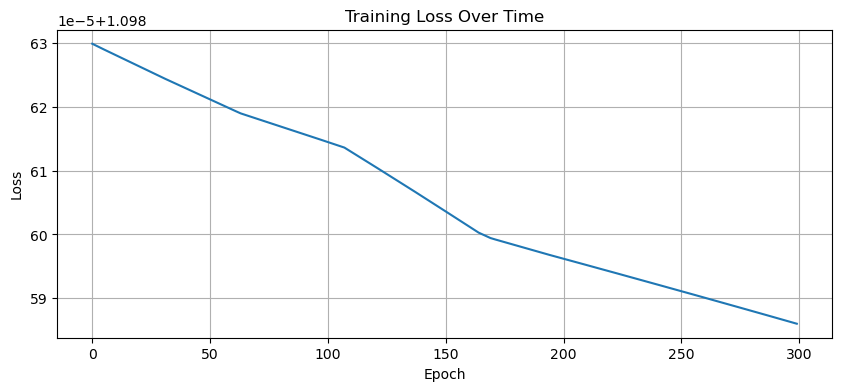

Original text: "I really enjoyed this movie, it was fantastic!"

Step 1: Breaking text into tokens (words)



Step 2: Converting tokens to numbers using our vocabulary


,Token,Token ID
0,i,6
1,really,1
2,enjoy,1
3,thi,5
4,movie,3
5,it,7
6,was,2
7,fantastic,1



Step 3: Making a prediction using our neural network

Prediction: negative with 33.34% confidence


,Class,Probability
0,negative,33.34%
1,neutral,33.33%
2,positive,33.33%


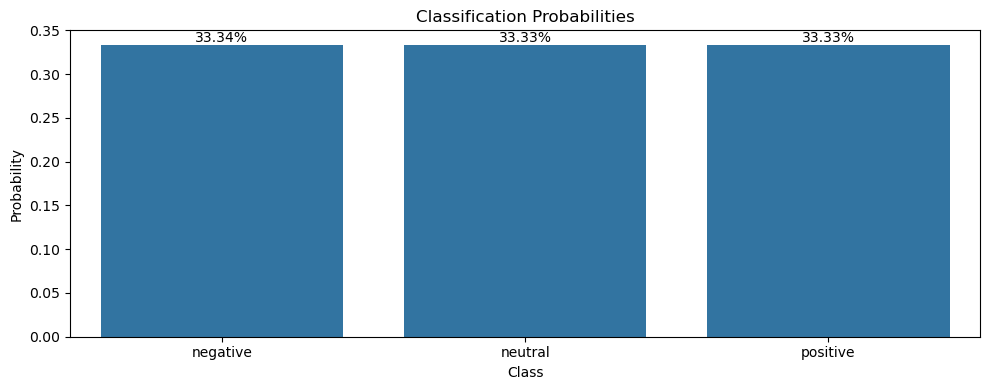


--------------------------------------------------

Original text: "This was the worst film I've ever seen."

Step 1: Breaking text into tokens (words)



Step 2: Converting tokens to numbers using our vocabulary


,Token,Token ID
0,thi,5
1,was,2
2,worst,1
3,film,4
4,ive,1
5,ever,1
6,seen,1



Step 3: Making a prediction using our neural network

Prediction: negative with 33.34% confidence


,Class,Probability
0,negative,33.34%
1,neutral,33.33%
2,positive,33.33%


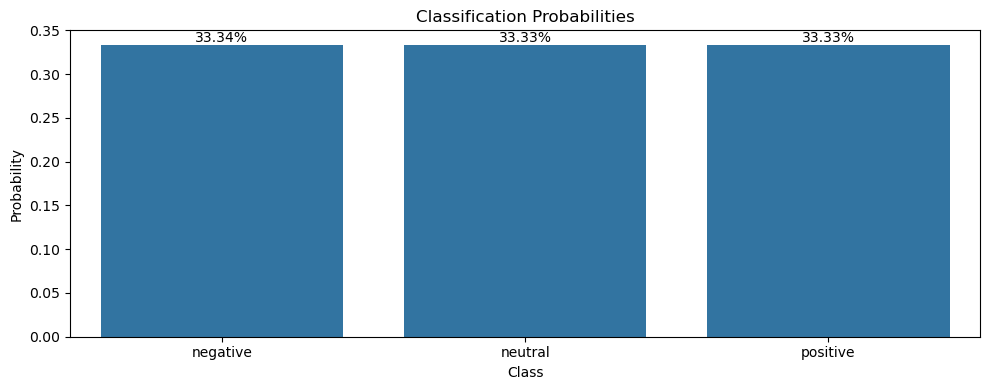


--------------------------------------------------

Original text: "The movie was fine, I guess."

Step 1: Breaking text into tokens (words)



Step 2: Converting tokens to numbers using our vocabulary


,Token,Token ID
0,movie,3
1,was,2
2,fine,1
3,i,6
4,guess,1



Step 3: Making a prediction using our neural network

Prediction: negative with 33.34% confidence


,Class,Probability
0,negative,33.34%
1,neutral,33.33%
2,positive,33.33%


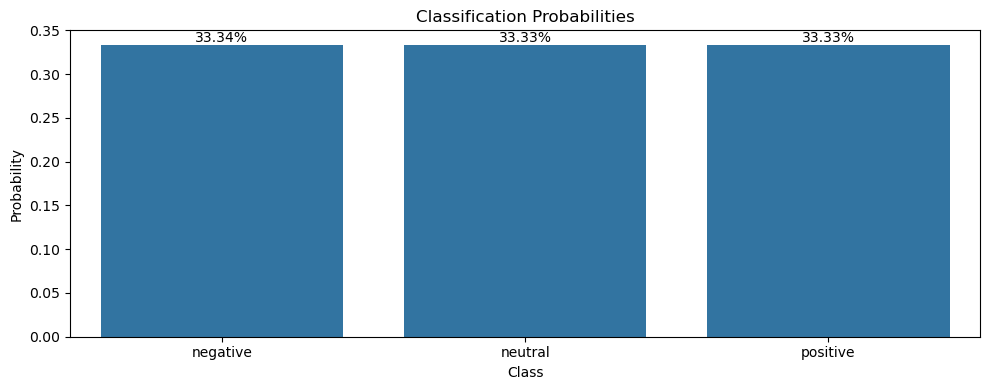


--------------------------------------------------



In [15]:
# Sample sentiment analysis data
train_texts = [
    "This movie was amazing! I loved every minute of it.",
    "Great performances by the entire cast. Highly recommended.",
    "The special effects were incredible and the plot was engaging.",
    "This film was a complete waste of time. Terrible acting.",
    "I hated the ending. Very disappointing movie overall.",
    "Boring plot with predictable twists. Don't bother watching.",
    "The movie was okay, nothing special but not terrible either.",
    "Average film with some good moments and some dull parts.",
    "It was neither great nor awful, just a standard film."
]

train_labels = [
    "positive", "positive", "positive",
    "negative", "negative", "negative",
    "neutral", "neutral", "neutral"
]

# Create and train a classifier
classifier = TextClassifier(embedding_dim=20, hidden_size=10)
losses = classifier.train(train_texts, train_labels, epochs=300)

# Plot the loss curve
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Test with new examples and visualize the complete process
test_examples = [
    "I really enjoyed this movie, it was fantastic!",
    "This was the worst film I've ever seen.",
    "The movie was fine, I guess."
]

for example in test_examples:
    classifier.visualize_prediction(example)
    print("\n" + "-"*50 + "\n")

## 6. Summary and Next Steps

In this notebook, we've built a complete NLP pipeline from scratch using only Python and NumPy:

1. **Document Loading**: We implemented loaders for different document formats including PDF, DOCX, and plain text.

2. **Text Preprocessing**: We built a preprocessing pipeline that cleans, tokenizes, and normalizes text data.

3. **Feature Engineering**: We created word embeddings to represent text as numerical vectors.

4. **Neural Network**: We implemented a feed-forward neural network for text classification.

5. **Text Classification**: We built a complete sentiment analysis system that classifies text as positive, negative, or neutral.

### Further Improvements

There are many ways to enhance this basic implementation:

1. **Better Tokenization**: Implement more sophisticated tokenization methods like subword tokenization (BPE, WordPiece)

2. **Better Embeddings**: Implement word2vec or GloVe-style embeddings trained on your data

3. **Network Architecture**: Add more layers, implement recurrent or transformer architectures

4. **Regularization**: Add dropout, batch normalization, or weight decay to prevent overfitting

5. **Evaluation**: Implement cross-validation and more evaluation metrics

### Remember

This implementation is designed for educational purposes to understand how NLP systems work from the ground up. For production use, established libraries like spaCy, Hugging Face Transformers, or TensorFlow/PyTorch would be more efficient and robust.

Training the classifier...
Epoch 0, Loss: 1.0986
Epoch 100, Loss: 1.0986
Epoch 200, Loss: 1.0986
Epoch 300, Loss: 1.0986
Epoch 400, Loss: 1.0986


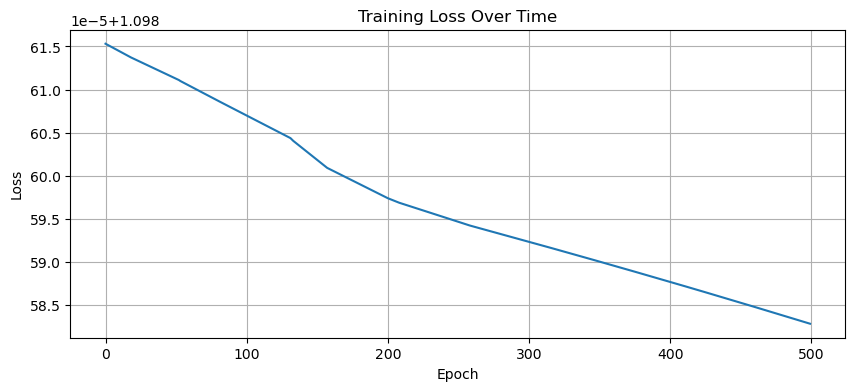


Making predictions on new text examples:
--------------------------------------------------

Text: "This film exceeded all my expectations! The acting was phenomenal and the story was captivating."
Predicted sentiment: negative

Confidence scores:
negative: 33.34%
neutral: 33.33%
positive: 33.33%
--------------------------------------------------

Text: "I was really disappointed with this movie. The plot was confusing and the acting was subpar."
Predicted sentiment: negative

Confidence scores:
negative: 33.34%
neutral: 33.33%
positive: 33.33%
--------------------------------------------------

Text: "The movie was decent. Some scenes were good, others were a bit slow."
Predicted sentiment: negative

Confidence scores:
negative: 33.34%
neutral: 33.33%
positive: 33.33%
--------------------------------------------------

Text: "What an incredible experience! The cinematography was breathtaking and the performances were outstanding."
Predicted sentiment: neutral

Confidence scores:
nega


Step 2: Converting tokens to numbers using our vocabulary


,Token,Token ID
0,thi,4
1,film,6
2,exceed,1
3,my,1
4,expectation,1
5,act,8
6,was,2
7,phenomenal,1
8,story,15
9,was,2



Step 3: Making a prediction using our neural network

Prediction: negative with 33.34% confidence


,Class,Probability
0,negative,33.34%
1,neutral,33.33%
2,positive,33.33%


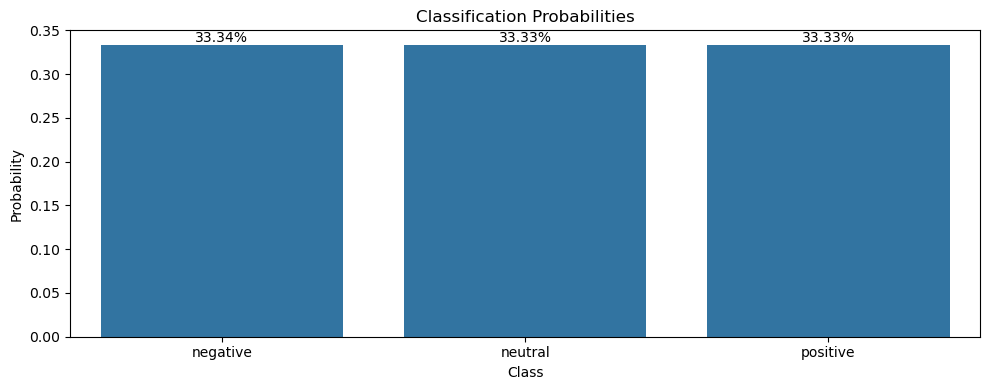

In [16]:
# First, let's create a more diverse training dataset
train_texts = [
    # Positive examples
    "This movie was absolutely amazing! The acting was superb and the plot was engaging.",
    "I loved every minute of this film. The special effects were incredible.",
    "What a fantastic experience! The cinematography was beautiful and the story was touching.",
    "Highly recommended! The performances were outstanding and the direction was perfect.",
    
    # Negative examples
    "This was the worst movie I've ever seen. Terrible acting and a boring plot.",
    "I hated every minute of this film. The special effects were cheap and unconvincing.",
    "What a waste of time! The story made no sense and the characters were unlikable.",
    "Not recommended at all. The performances were wooden and the direction was confusing.",
    
    # Neutral examples
    "The movie was okay. Some parts were good, others not so much.",
    "It was an average film. Nothing special but not terrible either.",
    "The movie had its moments, but overall it was just decent.",
    "Neither great nor awful. Just a standard film with some good and bad parts."
]

train_labels = [
    "positive", "positive", "positive", "positive",
    "negative", "negative", "negative", "negative",
    "neutral", "neutral", "neutral", "neutral"
]

# Create and train the classifier
classifier = TextClassifier(embedding_dim=20, hidden_size=10)
print("Training the classifier...")
losses = classifier.train(train_texts, train_labels, epochs=500)

# Plot the training loss
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Test with new examples
test_examples = [
    "This film exceeded all my expectations! The acting was phenomenal and the story was captivating.",
    "I was really disappointed with this movie. The plot was confusing and the acting was subpar.",
    "The movie was decent. Some scenes were good, others were a bit slow.",
    "What an incredible experience! The cinematography was breathtaking and the performances were outstanding.",
    "This was a complete waste of time. The story made no sense and the characters were unlikable.",
    "The film was okay, but nothing special. The plot was predictable and the acting was average."
]

print("\nMaking predictions on new text examples:")
print("-" * 50)

for example in test_examples:
    # Get prediction with explanation
    results = classifier.predict_with_explanation(example)
    
    # Display results in a clear format
    print(f"\nText: \"{example}\"")
    print(f"Predicted sentiment: {results['predicted_class']}")
    print("\nConfidence scores:")
    for class_name, prob in results['class_probabilities'].items():
        print(f"{class_name}: {prob:.2%}")
    print("-" * 50)

# Let's also visualize one prediction in detail
print("\nDetailed visualization of one prediction:")
classifier.visualize_prediction(test_examples[0])

Training language model on cpu...
Vocabulary size: 31
Epoch [1/50], Step [50/95], Loss: 2.0690
Epoch [1/50], Loss: 2.2183
Epoch [2/50], Step [50/95], Loss: 1.0683
Epoch [2/50], Loss: 1.0799
Epoch [3/50], Step [50/95], Loss: 0.5431
Epoch [3/50], Loss: 0.5522
Epoch [4/50], Step [50/95], Loss: 0.3542
Epoch [4/50], Loss: 0.3800
Epoch [5/50], Step [50/95], Loss: 0.3351
Epoch [5/50], Loss: 0.3247
Epoch [6/50], Step [50/95], Loss: 0.3153
Epoch [6/50], Loss: 0.3013
Epoch [7/50], Step [50/95], Loss: 0.2735
Epoch [7/50], Loss: 0.2898
Epoch [8/50], Step [50/95], Loss: 0.2929
Epoch [8/50], Loss: 0.2803
Epoch [9/50], Step [50/95], Loss: 0.2781
Epoch [9/50], Loss: 0.2722
Epoch [10/50], Step [50/95], Loss: 0.2862
Epoch [10/50], Loss: 0.2688
Epoch [11/50], Step [50/95], Loss: 0.2633
Epoch [11/50], Loss: 0.2640
Epoch [12/50], Step [50/95], Loss: 0.2522
Epoch [12/50], Loss: 0.2615
Epoch [13/50], Step [50/95], Loss: 0.2563
Epoch [13/50], Loss: 0.2578
Epoch [14/50], Step [50/95], Loss: 0.2620
Epoch [14/50

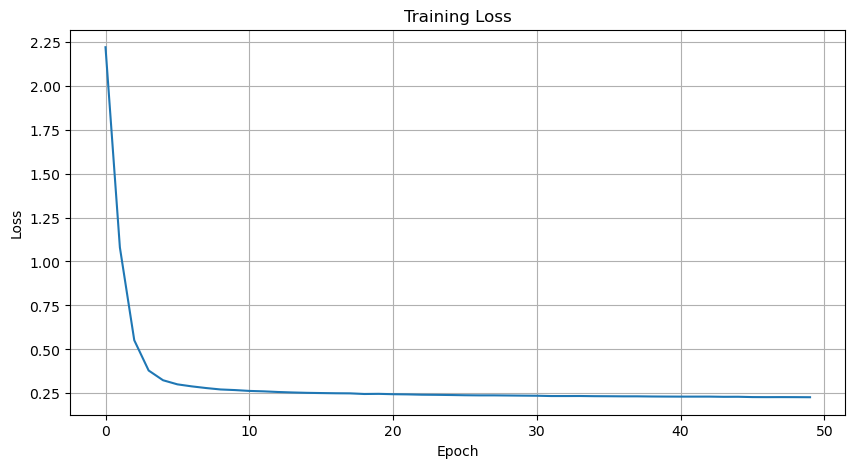


Generating text samples:
--------------------------------------------------

Temperature: 0.5
intelligence based on the idea that systems can learn from data identify patterns and make decisions with minimal human intervention. machine learning is a method of data analysis that automates analytical model 
--------------------------------------------------

Temperature: 0.8
intelligence was first coined in 1956 at a conference at dartmouth college. since then ai has gone through numerous cycles of optimism and disappointment breakthroughs and setbacks. language is a complex system o
--------------------------------------------------

Temperature: 1.2
intelligence concerstanding the contents of documents including the contextual nuances of the language within them. the technology can intervention. machine learning algorithms build a mathematical model based on
--------------------------------------------------


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import re
from torch.utils.data import Dataset, DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Text preprocessing
def preprocess_text(text):
    # Clean text
    text = text.lower()
    text = re.sub(r'[^\w\s.]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Character-level dataset
class CharDataset(Dataset):
    def __init__(self, text, seq_length=20):
        self.text = preprocess_text(text)
        self.seq_length = seq_length
        
        # Create character vocabulary
        self.chars = sorted(list(set(self.text)))
        self.char_to_idx = {ch: i for i, ch in enumerate(self.chars)}
        self.idx_to_char = {i: ch for i, ch in enumerate(self.chars)}
        self.vocab_size = len(self.chars)
        
        # Create training samples
        self.data = self._create_samples()
    
    def _create_samples(self):
        char_indices = [self.char_to_idx[ch] for ch in self.text]
        samples = []
        
        for i in range(0, len(char_indices) - self.seq_length - 1, 1):
            input_seq = char_indices[i:i + self.seq_length]
            target_seq = char_indices[i + 1:i + self.seq_length + 1]
            samples.append((input_seq, target_seq))
            
        return samples
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        input_seq, target_seq = self.data[idx]
        return torch.tensor(input_seq), torch.tensor(target_seq)

# Simple language model
class SimpleRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=64, hidden_size=128, num_layers=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.vocab_size = vocab_size
        
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, x):
        # x shape: [batch_size, seq_length]
        batch_size = x.size(0)
        
        # Embedding: [batch_size, seq_length, embed_size]
        x = self.embedding(x)
        
        # Initialize hidden state
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        
        # Forward propagate RNN
        # out: [batch_size, seq_length, hidden_size]
        out, _ = self.rnn(x, h0)
        
        # Reshape output to [batch_size * seq_length, hidden_size]
        out = out.reshape(-1, out.shape[2])
        
        # Decode hidden states to get output for each time step
        out = self.fc(out)
        
        return out

# Train the model
def train_model(model, train_loader, num_epochs=50, learning_rate=0.001):
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    losses = []
    
    for epoch in range(num_epochs):
        total_loss = 0
        for i, (inputs, targets) in enumerate(train_loader):
            inputs = inputs.to(device)
            targets = targets.to(device).view(-1)  # Flatten targets
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            
            # Clip gradients
            nn.utils.clip_grad_norm_(model.parameters(), 5)
            
            optimizer.step()
            
            total_loss += loss.item()
            
            # Print progress
            if (i+1) % 50 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
        
        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')
    
    return losses

# Generate text
def generate_text(model, dataset, seed_text, length=200, temperature=1.0):
    model.eval()
    
    # Process seed text
    chars = [ch for ch in seed_text.lower() if ch in dataset.char_to_idx]
    
    # Pad if needed
    while len(chars) < dataset.seq_length:
        chars.insert(0, ' ')
    
    # Keep only the last seq_length characters
    chars = chars[-dataset.seq_length:]
    
    # Convert to indices
    with torch.no_grad():
        indices = [dataset.char_to_idx[ch] for ch in chars]
        current_seq = torch.tensor([indices]).to(device)
        
        result = seed_text
        
        # Generate new characters
        for _ in range(length):
            output = model(current_seq)
            
            # Get prediction for the last character
            output = output[-dataset.seq_length:].view(-1, dataset.vocab_size)[-1]
            
            # Apply temperature
            scaled_output = output / temperature
            
            # Convert to probabilities
            probabilities = torch.softmax(scaled_output, dim=0).cpu().numpy()
            
            # Sample next character
            next_idx = np.random.choice(dataset.vocab_size, p=probabilities)
            next_char = dataset.idx_to_char[next_idx]
            
            # Add to result
            result += next_char
            
            # Update current sequence
            indices = indices[1:] + [next_idx]
            current_seq = torch.tensor([indices]).to(device)
    
    return result

# Main script
def main():
    # Sample text
    text = """
    Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence 
    concerned with the interactions between computers and human language, in particular how to program computers to 
    process and analyze large amounts of natural language data. The result is a computer capable of "understanding" 
    the contents of documents, including the contextual nuances of the language within them. The technology can then 
    accurately extract information and insights contained in the documents as well as categorize and organize the 
    documents themselves.

    Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial 
    intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal 
    human intervention. Machine learning algorithms build a mathematical model based on sample data, known as "training 
    data", in order to make predictions or decisions without being explicitly programmed to perform the task.

    Deep learning is a subset of machine learning in artificial intelligence that has networks capable of learning 
    unsupervised from data that is unstructured or unlabeled. Also known as deep neural learning or deep neural network, 
    deep learning models can achieve state-of-the-art accuracy, sometimes exceeding human-level performance.

    Natural Language Processing combines computer science, artificial intelligence, and computational linguistics to 
    enable computers to process, understand, and generate human language. NLP applications include machine translation, 
    sentiment analysis, speech recognition, and text summarization. The field has advanced significantly with deep 
    learning approaches, particularly with transformer models like BERT and GPT, which have revolutionized how machines 
    understand and generate text.

    Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between 
    vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing 
    research to fraud detection and risk assessment.

    The term "artificial intelligence" was first coined in 1956, at a conference at Dartmouth College. Since then, AI has gone 
    through numerous cycles of optimism and disappointment, breakthroughs and setbacks.

    Language is a complex system of communication that includes syntax, semantics, phonetics, and pragmatics. Natural Language 
    Processing aims to address all these aspects to create systems that truly understand human language.

    When training language models, one common challenge is overfitting, where the model performs well on training data but 
    fails to generalize to new, unseen examples. Regularization techniques like dropout and weight decay help mitigate this issue.

    Text generation has many practical applications, including content creation, chatbots, automated reporting, and creative 
    writing assistance. Modern language models can generate coherent, contextually relevant text that is often indistinguishable 
    from human-written content.
    """
    
    # Hyperparameters
    seq_length = 25
    batch_size = 32
    embedding_size = 64
    hidden_size = 128
    num_layers = 2
    learning_rate = 0.002
    num_epochs = 50
    
    # Create dataset and dataloader
    dataset = CharDataset(text, seq_length)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    # Initialize model
    model = SimpleRNN(
        vocab_size=dataset.vocab_size,
        embed_size=embedding_size,
        hidden_size=hidden_size,
        num_layers=num_layers
    ).to(device)
    
    # Train model
    print(f"Training language model on {device}...")
    print(f"Vocabulary size: {dataset.vocab_size}")
    losses = train_model(model, dataloader, num_epochs=num_epochs, learning_rate=learning_rate)
    
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
    
    # Generate text
    print("\nGenerating text samples:")
    print("-" * 50)
    
    for temp in [0.5, 0.8, 1.2]:
        print(f"\nTemperature: {temp}")
        generated = generate_text(model, dataset, "intelligence", length=200, temperature=temp)
        print(generated)
        print("-" * 50)

if __name__ == "__main__":
    main()